# <center> Understanding Data - Coursework   

### <center> || Customer Churn Prediction - Using Various Machine Learing Models ||

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import warnings
warnings.filterwarnings(action='ignore')

sns.set(style="ticks", context="talk")

In [151]:
data = pd.read_csv("Group 2.csv")

In [152]:
data.describe()

,Unnamed: 0,partner,senior,Tenure,package
count,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,3674.500000,0.549252,0.172925,8.665947,2.425850
std,2121.906572,0.497602,0.378208,6.404877,1.151303
min,0.000000,0.000000,0.000000,-4.690416,1.000000
25%,1837.250000,0.000000,0.000000,3.000000,1.000000
50%,3674.500000,1.000000,0.000000,8.000000,2.000000
75%,5511.750000,1.000000,0.000000,14.000000,4.000000
max,7349.000000,1.000000,1.000000,30.000000,4.000000


In [153]:
data.shape

(7350, 12)

In [154]:
data.head()

,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,0,K3713,Male,Hampshire,0,Unknown,0,12.0,NaN,1,6,Churn=No
1,1,D9048,Male,Greater Manchester,1,1,0,21.0,NaN,4,6,Churn=No
2,2,K8227,Female,West Yorkshire,0,Unknown,0,0.0,NaN,1,4,Churn=Yes
3,3,H3533,Male,Greater London,1,1,1,11.0,NaN,2,4,Churn=No
4,4,J4501,Male,Greater London,0,0,0,7.0,NaN,4,2,Churn=Yes


In [155]:
data.isnull()

,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7345,False,False,False,False,False,False,False,False,True,False,False,False
7346,False,False,False,False,False,False,False,False,True,False,False,False
7347,False,False,False,False,False,False,False,False,True,False,False,False
7348,False,False,False,False,False,False,False,False,True,False,False,False


In [156]:
# try to find if the data has any null values or not
data.isnull().sum()

Unnamed: 0         0
customer_id        0
gender             0
location           0
partner            0
dependents         0
senior             0
Tenure             0
monthly_cost    7283
package            0
survey             0
Class             49
dtype: int64

In [157]:
#droping customer id which is not required for further analysis
data.drop(['Unnamed: 0','customer_id'], inplace =True, axis =1)

In [158]:
data.dropna(subset=['Class'], inplace=True)

In [159]:
# checking for duplicate values
data.duplicated().any()

True

In [160]:
# drop duplicate values
data.drop_duplicates()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,Male,Hampshire,0,Unknown,0,12.0,NaN,1,6,Churn=No
1,Male,Greater Manchester,1,1,0,21.0,NaN,4,6,Churn=No
2,Female,West Yorkshire,0,Unknown,0,0.0,NaN,1,4,Churn=Yes
3,Male,Greater London,1,1,1,11.0,NaN,2,4,Churn=No
4,Male,Greater London,0,0,0,7.0,NaN,4,2,Churn=Yes
...,...,...,...,...,...,...,...,...,...,...
7344,Male,Greater London,1,Unknown,0,0.0,NaN,1,6,Churn=Yes
7346,Male,Hampshire,0,0,0,2.0,NaN,1,5,Churn=Yes
7347,Male,Greater London,1,1,0,16.0,NaN,4,2,Churn=No
7348,Female,Greater London,0,1,0,17.0,NaN,1,4,Churn=Yes


In [161]:
# changing the class column
data.Class=data['Class'].replace(to_replace ='[yY]', value = 1, regex = True)
data.Class=data['Class'].replace(to_replace ='[Nn]', value = 0, regex = True)
data.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,Male,Hampshire,0,Unknown,0,12.0,NaN,1,6,0
1,Male,Greater Manchester,1,1,0,21.0,NaN,4,6,0
2,Female,West Yorkshire,0,Unknown,0,0.0,NaN,1,4,1
3,Male,Greater London,1,1,1,11.0,NaN,2,4,0
4,Male,Greater London,0,0,0,7.0,NaN,4,2,1


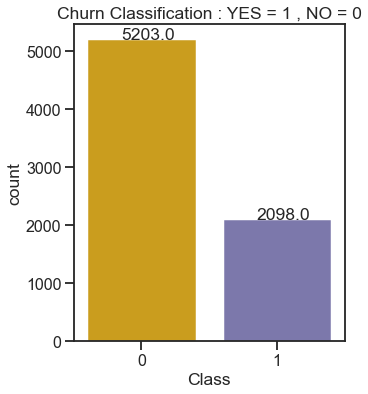

In [162]:
#plot of Churn column
plt.figure(figsize = (5,6), dpi = 70)
ax = sns.countplot(x = "Class", data = data, palette = "Dark2_r")
#to show bar values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))
plt.title('Churn Classification : YES = 1 , NO = 0')
plt.show()

In [163]:
# changing gender column
data.gender=data.gender.map({'Female':0, 'Male':1})
data.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,1,Hampshire,0,Unknown,0,12.0,NaN,1,6,0
1,1,Greater Manchester,1,1,0,21.0,NaN,4,6,0
2,0,West Yorkshire,0,Unknown,0,0.0,NaN,1,4,1
3,1,Greater London,1,1,1,11.0,NaN,2,4,0
4,1,Greater London,0,0,0,7.0,NaN,4,2,1


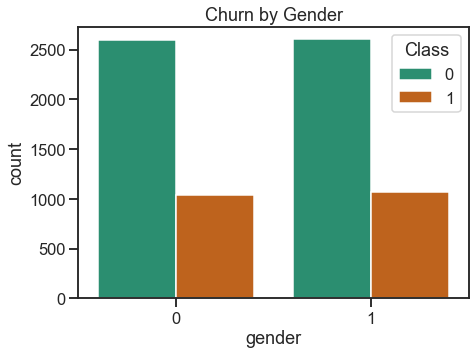

In [164]:
# plot of gender vs churn
plt.figure(figsize = (7,5))
ax = sns.countplot(x = 'gender', hue = 'Class', data = data, palette = "Dark2")
plt.title('Churn by Gender')
plt.show()

In [165]:
# dependants
data.dependents.unique()

array(['Unknown', '1', '0'], dtype=object)

In [166]:
data.dependents=data.dependents.apply(pd.to_numeric, errors='coerce')
data.dependents.unique()

array([nan,  1.,  0.])

In [167]:
# import the KNNimputer class
from sklearn.impute import KNNImputer
dependents_Before_imputation=data[['dependents']]
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)
dependents_After_imputation = imputer.fit_transform(dependents_Before_imputation)
data['dependents']=dependents_After_imputation.astype(int)

In [168]:
data.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,1,Hampshire,0,0,0,12.0,NaN,1,6,0
1,1,Greater Manchester,1,1,0,21.0,NaN,4,6,0
2,0,West Yorkshire,0,0,0,0.0,NaN,1,4,1
3,1,Greater London,1,1,1,11.0,NaN,2,4,0
4,1,Greater London,0,0,0,7.0,NaN,4,2,1


In [169]:
#survey
data.survey=data.survey.apply(pd.to_numeric, errors='coerce')
data.survey.unique()

array([ 6.,  4.,  2.,  3.,  8.,  1.,  5.,  7., nan,  9.,  0., 10.])

In [170]:
survey_Before_imputation=data[['survey']]
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)
survey_After_imputation = imputer.fit_transform(survey_Before_imputation)
data['survey']=survey_After_imputation.astype(int)

In [171]:
data.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,1,Hampshire,0,0,0,12.0,NaN,1,6,0
1,1,Greater Manchester,1,1,0,21.0,NaN,4,6,0
2,0,West Yorkshire,0,0,0,0.0,NaN,1,4,1
3,1,Greater London,1,1,1,11.0,NaN,2,4,0
4,1,Greater London,0,0,0,7.0,NaN,4,2,1


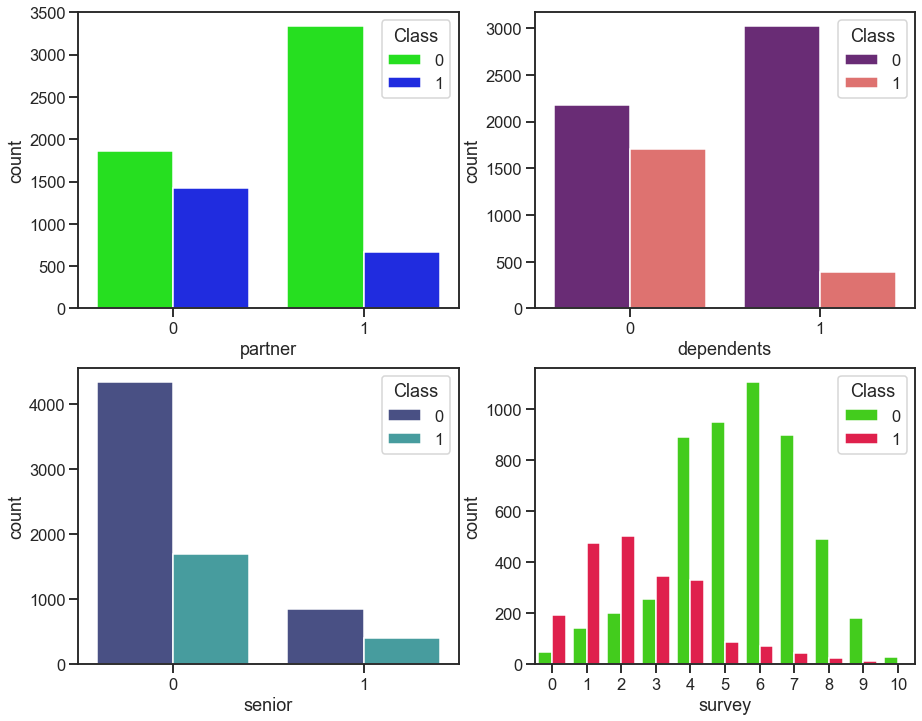

In [172]:
# plot for Partner vs Churn, Dependants vs Churn, Senior vs Churn, Survey vs Churn
fig, ax = plt.subplots(2, 2,figsize=(15,12))
sns.countplot(data = data, x = 'partner', hue = 'Class', palette = 'hsv', ax = ax[0,0])
sns.countplot(data = data, x = 'dependents', hue = 'Class', palette = 'magma', ax = ax[0,1])
sns.countplot(data = data, x = 'senior', hue = 'Class', palette = 'mako', ax = ax[1,0])
sns.countplot(data = data, x = 'survey', hue = 'Class', palette = 'prism', ax = ax[1,1])
plt.show()

In [173]:
# changing monthly cost column
package_cost=[26,34,40,46]
#data['monthly_cost']=[0 for i in range(len(data))]
#print(data.head())
data['monthly_cost'] = [package_cost[i-1] for i in data['package']]
data.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,1,Hampshire,0,0,0,12.0,26,1,6,0
1,1,Greater Manchester,1,1,0,21.0,46,4,6,0
2,0,West Yorkshire,0,0,0,0.0,26,1,4,1
3,1,Greater London,1,1,1,11.0,34,2,4,0
4,1,Greater London,0,0,0,7.0,46,4,2,1


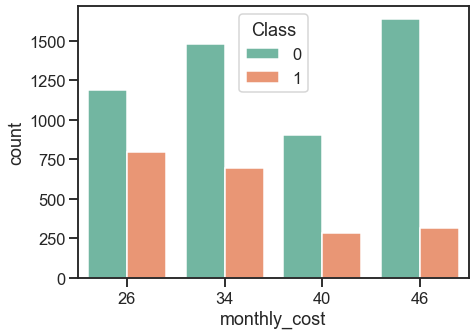

In [174]:
# plot for Monthly cost vs Churn
plt.figure(figsize = (7,5))
sns.countplot(data = data, x = 'monthly_cost', hue = 'Class', palette = 'Set2')
plt.show()

In [175]:
#count number of negative tenure values
len([i for i in data.Tenure if i<0])

132

In [176]:
# changing Tenure Column
data=data[data.Tenure >=0]
data.Tenure=data.Tenure.astype(int)
data.Class=data.Class.astype(int)
data.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,1,Hampshire,0,0,0,12,26,1,6,0
1,1,Greater Manchester,1,1,0,21,46,4,6,0
2,0,West Yorkshire,0,0,0,0,26,1,4,1
3,1,Greater London,1,1,1,11,34,2,4,0
4,1,Greater London,0,0,0,7,46,4,2,1


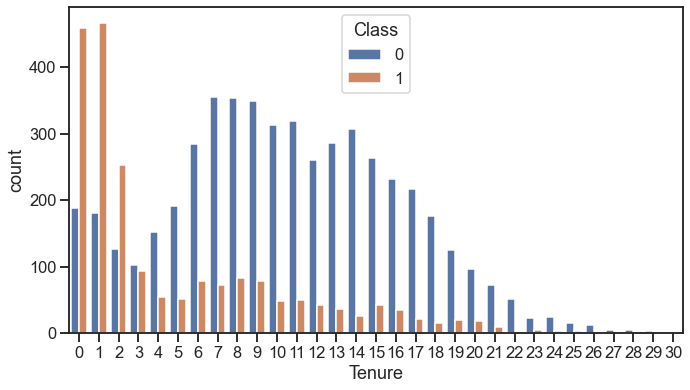

In [177]:
# plot for Tenure vs Churn
plt.figure(figsize = (11,6))
sns.countplot(x = 'Tenure', hue = 'Class', data = data)
plt.show()

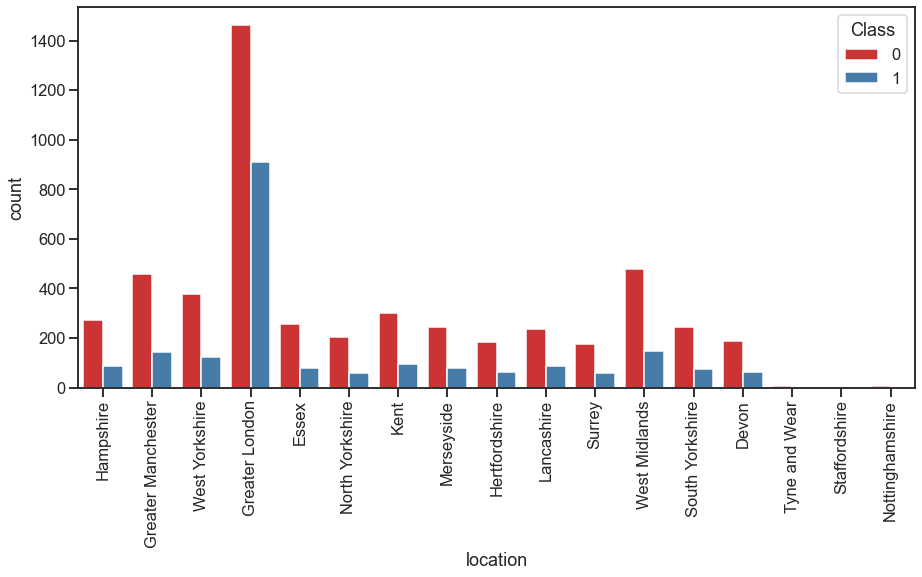

In [178]:
# plot for Location vs Churn
plt.figure(figsize = (15,7))
chart = sns.countplot(x = 'location', hue = 'Class', data = data, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [179]:
data = data.reset_index(drop=True)

In [180]:
total_cost = []
for i in range(len(data)):
    a = data.Tenure[i]
    t_cost = data.monthly_cost[i]
    if a >= 1:
        t_cost = t_cost * 12
        p = t_cost
        x = 1
        while x <= 25 and x != a:
            p = p - p * 0.02
            t_cost+=p
            x+=1
            if a in range(26,31):
                t_cost+=p * (a - 25)
    total_cost.append(round(t_cost,2))
data['Total_cost'] = total_cost
data.head()  

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,Total_cost
0,1,Hampshire,0,0,0,12,26,1,6,0,3358.42
1,1,Greater Manchester,1,1,0,21,46,4,6,0,9542.54
2,0,West Yorkshire,0,0,0,0,26,1,4,1,26.00
3,1,Greater London,1,1,1,11,34,2,4,0,4065.08
4,1,Greater London,0,0,0,7,46,4,2,1,3639.74


In [181]:
# plot for Total cost vs Churn
# plt.figure(figsize = (15,7))
# chart = sns.countplot(x = 'Total_cost', hue = 'Class', data = data, palette='Set1_r')
# chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
# plt.show()

In [182]:
# droping monthly cost
data.drop('monthly_cost',inplace=True,axis=1)

data.head()

,gender,location,partner,dependents,senior,Tenure,package,survey,Class,Total_cost
0,1,Hampshire,0,0,0,12,1,6,0,3358.42
1,1,Greater Manchester,1,1,0,21,4,6,0,9542.54
2,0,West Yorkshire,0,0,0,0,1,4,1,26.00
3,1,Greater London,1,1,1,11,2,4,0,4065.08
4,1,Greater London,0,0,0,7,4,2,1,3639.74


Create dummy variables for categorical features

Since ML algorithms require numeric values for the input vector X, the categorical features are first converted into numeric values. The Pandas function pd.get_dummies is used for this. This function converts categorical variables to a series of zeros and ones.

In [183]:
# changing location column from label to binary using dummies for further analysis
final_df = pd.get_dummies(data)

#view final df
final_df.head()

,gender,partner,dependents,senior,Tenure,package,survey,Class,Total_cost,location_Devon,...,location_Lancashire,location_Merseyside,location_North Yorkshire,location_Nottinghamshire,location_South Yorkshire,location_Staffordshire,location_Surrey,location_Tyne and Wear,location_West Midlands,location_West Yorkshire
0,1,0,0,0,12,1,6,0,3358.42,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,21,4,6,0,9542.54,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,4,1,26.00,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,11,2,4,0,4065.08,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,7,4,2,1,3639.74,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# rows index reset..if some rows deleted it gets reassigned in seqeuence manner
final_df = final_df.reset_index(drop = True)

Split Features

Features are split into numeric and categorical features. Shape and head for numeric resp. categorical features are shown.

##### Normalizing numeric features

Numerical features also have to be transformed for use in ML algorithms, since the different features usually have different value ranges. Some models, such as decision trees, are not sensitive to the range of values of the features, while other models (especially neural networks) react very strongly to it. The numeric features are therefore normalized.

In part 1 of this notebook we noticed that we have 20 outliers for the feature "total revenue". Even if these outliers are not extreme we have to be careful later on when conducting the churn prediction models. So here we use the StandardScaler, which (in contrast to the MinMaxScaler) can handle outliers well. The StandardScaler does not transform the original data to a specific value range, but rather ensures that the mean value is 0 and the variance is 1 for each feature

In [185]:
from sklearn.preprocessing import StandardScaler
# Normalizing the numeric features

# define data
x_num = final_df.drop('Class', axis = 1)
# define standard scaler
scaler = StandardScaler()
# transform data
x_num_scaled = scaler.fit_transform(x_num)
#print(x_num_scaled)

features = pd.DataFrame(x_num_scaled)

features =features.set_axis(['gender', 'partner', 'dependents', 'senior', 'Tenure', 'package', 'survey',
                          'Total_cost', 'location_Devon', 'location_Essex', 'location_Greater London', 
                          'location_Greater Manchester', 'location_Hampshire', 'location_Hertfordshire',
                          'location_Kent', 'location_Lancashire', 'location_Merseyside', 'location_North Yorkshire',
                          'location_Nottinghamshire', 'location_South Yorkshire', 'location_Staffordshire',
                          'location_Surrey', 'location_Tyne and Wear', 'location_West Midlands',
                          'location_West Yorkshire'], axis = 'columns')

In [186]:
features.head()

,gender,partner,dependents,senior,Tenure,package,survey,Total_cost,location_Devon,location_Essex,...,location_Lancashire,location_Merseyside,location_North Yorkshire,location_Nottinghamshire,location_South Yorkshire,location_Staffordshire,location_Surrey,location_Tyne and Wear,location_West Midlands,location_West Yorkshire
0,0.997075,-1.098729,-0.937899,-0.456428,0.500467,-1.241288,0.597806,-0.060353,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
1,0.997075,0.910143,1.066213,-0.456428,1.937202,1.368073,0.597806,2.011147,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
2,-1.002934,-1.098729,-0.937899,-0.456428,-1.415180,-1.241288,-0.273088,-1.176617,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,3.659998
3,0.997075,0.910143,1.066213,2.190927,0.340830,-0.371501,-0.273088,0.176357,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
4,0.997075,-1.098729,-0.937899,-0.456428,-0.297719,1.368073,-1.143982,0.033881,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224


Define X and y variables

Then we define our X and y variables. Our X variable corresponds to the features, whereas our y variables corresponds to our target variable (= churn rate)

In [187]:
#feature selection
X = features
y = final_df['Class']

In [188]:
X

,gender,partner,dependents,senior,Tenure,package,survey,Total_cost,location_Devon,location_Essex,...,location_Lancashire,location_Merseyside,location_North Yorkshire,location_Nottinghamshire,location_South Yorkshire,location_Staffordshire,location_Surrey,location_Tyne and Wear,location_West Midlands,location_West Yorkshire
0,0.997075,-1.098729,-0.937899,-0.456428,0.500467,-1.241288,0.597806,-0.060353,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
1,0.997075,0.910143,1.066213,-0.456428,1.937202,1.368073,0.597806,2.011147,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
2,-1.002934,-1.098729,-0.937899,-0.456428,-1.415180,-1.241288,-0.273088,-1.176617,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,3.659998
3,0.997075,0.910143,1.066213,2.190927,0.340830,-0.371501,-0.273088,0.176357,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
4,0.997075,-1.098729,-0.937899,-0.456428,-0.297719,1.368073,-1.143982,0.033881,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164,-1.002934,-1.098729,-0.937899,-0.456428,-1.255543,-1.241288,-1.579430,-1.080816,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
7165,0.997075,-1.098729,-0.937899,-0.456428,-1.095905,-1.241288,0.162359,-0.978395,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
7166,0.997075,0.910143,1.066213,-0.456428,1.139016,1.368073,-1.143982,1.368218,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224
7167,-1.002934,-1.098729,1.066213,-0.456428,1.298653,-1.241288,-0.273088,0.333626,-0.189691,-0.222096,...,-0.217915,-0.217563,-0.196301,-0.033424,-0.21509,-0.026418,-0.182877,-0.033424,-0.308772,-0.273224


In [189]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7164    1
7165    1
7166    0
7167    1
7168    0
Name: Class, Length: 7169, dtype: int32

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn import model_selection

#### Train Test Split

Before modeling, the data set is splitted into a training and a test data set by the ratio of 80/20. The training data set contains 5735 rows, the test data set 1434 rows.

In [191]:
# Split the dataset in train and test-set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

In [192]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5735, 25), (5735,), (1434, 25), (1434,))

In [193]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7164    1
7165    1
7166    0
7167    1
7168    0
Name: Class, Length: 7169, dtype: int32

We have successfully splited our data into 80% and 20%. Now its time to predict using different algorithms.

In [194]:
# Considered ML models

#using logistic regression
log = LogisticRegression()

#fitting our data
log.fit(X_train,y_train)

#making prediction
y_lr_pred = log.predict(X_test)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_lr_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_lr_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_lr_pred), 2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1025
           1       0.79      0.79      0.79       409

    accuracy                           0.88      1434
   macro avg       0.85      0.85      0.85      1434
weighted avg       0.88      0.88      0.88      1434

Accuracy score:  0.88
F1 Score:  0.79


So lets plot the confusion matrix for each of our model model to see how well they perform.

Logistic Regression Model


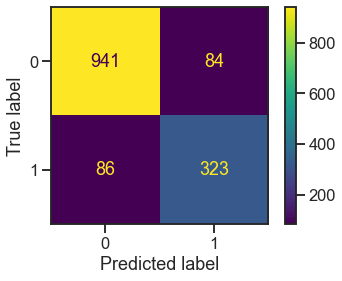

In [195]:
print('Logistic Regression Model')
plot_confusion_matrix(log, X_test, y_test, );

In [196]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=5)

#fitting our data
knn.fit(X_train, y_train)

#predicting the values.
y_knn_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_knn_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_knn_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_knn_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1025
           1       0.81      0.77      0.79       409

    accuracy                           0.88      1434
   macro avg       0.86      0.85      0.85      1434
weighted avg       0.88      0.88      0.88      1434

Accuracy score:  0.88
F1 Score:  0.79


KNN Model


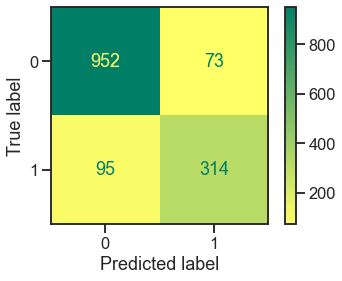

In [197]:
# Plot confusion matrix
print('KNN Model')
plot_confusion_matrix(knn, X_test, y_test, cmap='summer_r');

In [198]:
#using random forest classifier
rand = RandomForestClassifier()

#fitting the data
rand.fit(X_train,y_train)

#predicting values
y_rand_pred = rand.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_rand_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_rand_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_rand_pred), 2))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1025
           1       0.84      0.81      0.82       409

    accuracy                           0.90      1434
   macro avg       0.88      0.87      0.88      1434
weighted avg       0.90      0.90      0.90      1434

Accuracy score:  0.9
F1 Score:  0.82


Random Forest Model


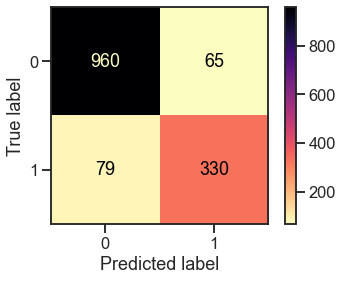

In [199]:
# Plot confusion matrix
print('Random Forest Model')
plot_confusion_matrix(rand, X_test, y_test, cmap='magma_r');

<AxesSubplot:>

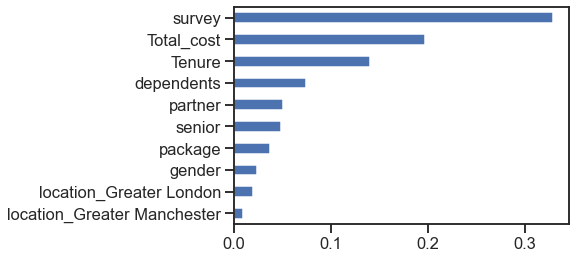

In [200]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

importances = rand.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

From random forest algorithm, survey, Total_cost, and tenure are the most important predictor variables to predict churn.
The results from random forest are very good

Surveys can lead to higher churn rates, customers are likely to churn because of it. Depending on the customer service we provide and the cost of packages will diectly impact on the survey. Having good survey values also reduces the proability of Churn

Lastly, customers are likely to churn because of it.as we have seen in the EDA the tenure with values 0 1 2 have highest probability for churn, it should be very prominent solutions that we give some good customer service to them or maybe create more hype of cost reduction in future so the will opt for the loyalty scheme and stays with the company 

In [201]:
#using support vector machine
svm_model = SVC(kernel='linear',probability=True)

#fitting our data
svm_model.fit(X_train,y_train)

#predicting values
y_svm_pred = svm_model.predict(X_test)
#svm_model.score(X_test,y_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_svm_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_svm_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_svm_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1025
           1       0.82      0.78      0.80       409

    accuracy                           0.89      1434
   macro avg       0.87      0.85      0.86      1434
weighted avg       0.89      0.89      0.89      1434

Accuracy score:  0.89
F1 Score:  0.8


SVM Model


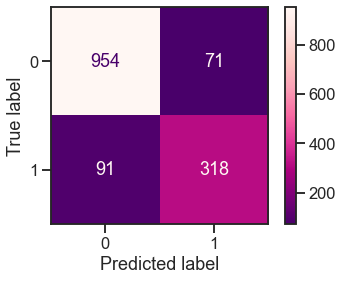

In [202]:
# Plot confusion matrix of SVM
print('SVM Model')
plot_confusion_matrix(svm_model, X_test, y_test, cmap='RdPu_r');

In [203]:
#using decision tree classifier
dec = DecisionTreeClassifier()

#fitting our data
dec.fit(X_train,y_train)

#predicting the values
y_dec_pred = dec.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_dec_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_dec_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_dec_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1025
           1       0.76      0.78      0.77       409

    accuracy                           0.87      1434
   macro avg       0.84      0.84      0.84      1434
weighted avg       0.87      0.87      0.87      1434

Accuracy score:  0.87
F1 Score:  0.77


DT Model


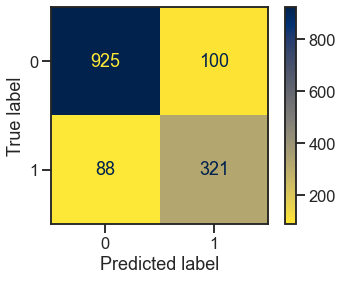

In [204]:
# Plot confusion matrix of SVM
print('DT Model')
plot_confusion_matrix(dec, X_test, y_test, cmap='cividis_r');

In [205]:
# Model Based On Survey VS Churn
#feature selection
X_s_vs_c = features['survey'].values.reshape(-1, 1)
y_s_vs_c = final_df['Class']

# Split the dataset in train and test-set 
X_train_s_vs_c, X_test_s_vs_c, y_train_s_vs_c, y_test_s_vs_c = train_test_split(X_s_vs_c, y_s_vs_c, 
                                                                                train_size = 0.8, random_state = 1)

X_train_s_vs_c.shape, y_train_s_vs_c.shape, X_test_s_vs_c.shape, y_test_s_vs_c.shape

((5735, 1), (5735,), (1434, 1), (1434,))

In [208]:
#using logistic regression
log_s_vs_c = LogisticRegression()

#fitting our data
log_s_vs_c.fit(X_train_s_vs_c, y_train_s_vs_c)

#making prediction
y_lr_pred_s_vs_c = log_s_vs_c.predict(X_test_s_vs_c)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test_s_vs_c, y_lr_pred_s_vs_c))
print('Accuracy score: ', round(accuracy_score(y_test_s_vs_c, y_lr_pred_s_vs_c), 2))
print('F1 Score: ', round(f1_score(y_test_s_vs_c, y_lr_pred_s_vs_c), 2))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1025
           1       0.75      0.59      0.66       409

    accuracy                           0.83      1434
   macro avg       0.80      0.75      0.77      1434
weighted avg       0.82      0.83      0.82      1434

Accuracy score:  0.83
F1 Score:  0.66


In [209]:
# Estimate KNN model and report outcomes
knn_s_vs_c = KNeighborsClassifier(n_neighbors = 10)

#fitting our data
knn_s_vs_c.fit(X_train_s_vs_c, y_train_s_vs_c)

#predicting the values.
y_knn_pred_s_vs_c = knn_s_vs_c.predict(X_test_s_vs_c)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test_s_vs_c, y_knn_pred_s_vs_c))
print('Accuracy score: ', round(accuracy_score(y_test_s_vs_c, y_knn_pred_s_vs_c), 2))
print('F1 Score: ', round(f1_score(y_test_s_vs_c, y_knn_pred_s_vs_c), 2))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1025
           1       0.68      0.74      0.71       409

    accuracy                           0.83      1434
   macro avg       0.79      0.80      0.79      1434
weighted avg       0.83      0.83      0.83      1434

Accuracy score:  0.83
F1 Score:  0.71
